In [91]:
import gzip
from collections import defaultdict
import math
import scipy.optimize
from sklearn import svm
import numpy
import string
import random
import string
from sklearn import linear_model

In [92]:
import warnings
warnings.filterwarnings("ignore")

In [93]:
def assertFloat(x):
    assert type(float(x)) == float

def assertFloatList(items, N):
    assert len(items) == N
    assert [type(float(x)) for x in items] == [float]*N

In [94]:
def readGz(path):
    for l in gzip.open(path, 'rt'):
        yield eval(l)

In [95]:
def readCSV(path):
    f = gzip.open(path, 'rt')
    f.readline()
    for l in f:
        u,b,r = l.strip().split(',')
        r = int(r)
        yield u,b,r

In [96]:
answers = {}

In [97]:
# Some data structures that will be useful

In [98]:
allRatings = []
for l in readCSV("train_Interactions.csv.gz"):
    allRatings.append(l)

In [99]:
len(allRatings)

200000

In [100]:
ratingsTrain = allRatings[:190000]
ratingsValid = allRatings[190000:]
ItemPerUser = defaultdict(set)
UserPerItem = defaultdict(set)
ratingsPerUser = defaultdict(list)
ratingsPerItem = defaultdict(list)

books = set()
for u,b,r in ratingsTrain:
    ratingsPerUser[u].append((b,r))
    ratingsPerItem[b].append((u,r))
    ItemPerUser[u].add(b)
    UserPerItem[b].add(u)
    books.add(b)

In [101]:
##################################################
# Rating prediction (CSE258 only)                #
##################################################

In [102]:
### Question 1

In [103]:
#Use a set to store all the book
books = set()
for u,b,r in allRatings:
    books.add(b)
books = list(books)
print(len(books),books[0])
Entry_Valid = []
#Pick a book randomly, maybe we do not need to one positive vs one negative
#we can make the number of nagative randomly
for u,b,r in ratingsValid:
    Entry_Valid.append((u,b,1))
    index = random.randint(0, len(books)-1)
    while books[index] in ItemPerUser[u]:
        index = random.randint(0, len(books)-1)
    if books[index] in ItemPerUser[u]:
        print("error")
    Entry_Valid.append((u,books[index],0))
print(len(Entry_Valid))

6688 b41957145
20000


In [104]:
### Would-read baseline: just rank which books are popular and which are not, and return '1' if a book is among the top-ranked
bookCount = defaultdict(int)
totalRead = 0

for user,book,_ in readCSV("train_Interactions.csv.gz"):
  bookCount[book] += 1
  totalRead += 1

mostPopular = [(bookCount[x], x) for x in bookCount]
mostPopular.sort()
mostPopular.reverse()

return1 = set()
count = 0
for ic, i in mostPopular:
  count += ic
  return1.add(i)
  if count > totalRead/2: break

In [105]:
#predict
#print(Entry_Valid)
acc = 0
for u,b,gt in Entry_Valid:
    if b in return1:
        pre = 1
    else:
        pre = 0
    if pre == gt:
        acc +=1
acc1 = acc/len(Entry_Valid)
print(acc1)

0.7112


In [108]:
answers['Q1'] = acc1

In [109]:
assertFloat(answers['Q1'])

In [110]:
### Question 2

In [111]:
#set thresholds
thresholds = [i/100 for i in range(1,101)]
accs = []
print(thresholds)

[0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1, 0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2, 0.21, 0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3, 0.31, 0.32, 0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4, 0.41, 0.42, 0.43, 0.44, 0.45, 0.46, 0.47, 0.48, 0.49, 0.5, 0.51, 0.52, 0.53, 0.54, 0.55, 0.56, 0.57, 0.58, 0.59, 0.6, 0.61, 0.62, 0.63, 0.64, 0.65, 0.66, 0.67, 0.68, 0.69, 0.7, 0.71, 0.72, 0.73, 0.74, 0.75, 0.76, 0.77, 0.78, 0.79, 0.8, 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87, 0.88, 0.89, 0.9, 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99, 1.0]


In [112]:
for threshold in thresholds:
   return1 = set()
   count = 0
   for ic, i in mostPopular:
     count += ic
     return1.add(i)
     if count > totalRead*threshold: break
   acc = 0
   for u,b,gt in Entry_Valid:
     if b in return1:
          pre = 1
     else:
        pre = 0
     if pre == gt:
        acc +=1
     acc1 = acc/len(Entry_Valid)
   print(acc1)
   accs.append(acc1)

0.5061
0.5099
0.51485
0.51965
0.5244
0.5286
0.5325
0.5369
0.5417
0.54535
0.54995
0.55445
0.55775
0.56375
0.56775
0.5731
0.57805
0.5832
0.58845
0.592
0.596
0.6007
0.6062
0.61035
0.61515
0.6197
0.62355
0.62815
0.63205
0.63645
0.64035
0.6452
0.64855
0.6523
0.65645
0.66005
0.66315
0.6675
0.67125
0.67395
0.6787
0.682
0.68485
0.68865
0.6925
0.69655
0.7001
0.7042
0.70855
0.7112
0.7142
0.71765
0.7204
0.7239
0.7263
0.72915
0.7305
0.7328
0.7347
0.7364
0.7387
0.7412
0.74275
0.74415
0.74575
0.7462
0.7477
0.74925
0.7504
0.75105
0.75225
0.7535
0.75355
0.7538
0.75305
0.75255
0.75145
0.7503
0.7477
0.7438
0.74195
0.73905
0.7356
0.7308
0.7246
0.71945
0.71415
0.708
0.6999
0.6936
0.68615
0.6764
0.66425
0.6502
0.6358
0.6207
0.60035
0.57785
0.54715
0.5


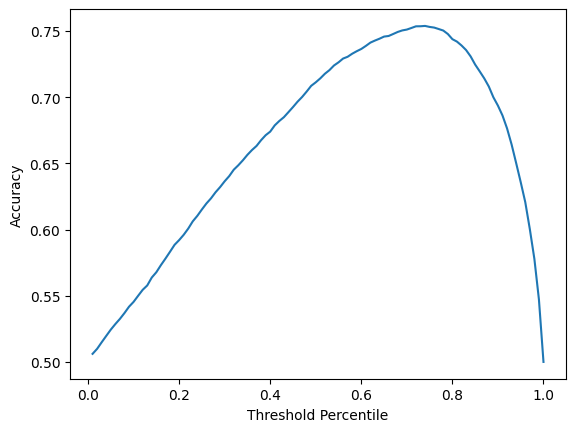

In [113]:
import matplotlib.pyplot as plt

plt.xlabel("Threshold Percentile")
plt.ylabel("Accuracy")
plt.plot(thresholds, accs)

In [114]:
best_threshold = thresholds[accs.index(max(accs))]
print("My best accurate %f" % max(accs))
print("The best threshold is %f " %best_threshold)

My best accurate 0.753800
The best threshold is 0.740000 


In [115]:
answers['Q2'] = [best_threshold, max(accs)]

In [116]:
assertFloat(answers['Q2'][0])
assertFloat(answers['Q2'][1])

In [117]:
### Question 3

In [118]:
def Jaccard(s1, s2):
    numerator = len(s1.intersection(s2))
    denominator = len(s1.union(s2))
    if(denominator == 0):
        return 0
    return numerator/denominator

In [119]:
def max_Jaccard(user, book):
    max_sim= 0
    for b_r in ItemPerUser[user]:
        sim = Jaccard(UserPerItem[book],UserPerItem[b_r])
        if sim > max_sim:
            max_sim = sim
    return max_sim
max_sim = {}
for u,b,_ in Entry_Valid:
    max_sim[(u,b)] = max_Jaccard(u, b)
print(max(max_sim.values()))

0.125


In [120]:
accs2 = []
thresholds2 = [i/10000 for i in range(1,101)]
#for i in range(1,11):
#    thresholds2.append(i/10)
print(thresholds2)

[0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.0006, 0.0007, 0.0008, 0.0009, 0.001, 0.0011, 0.0012, 0.0013, 0.0014, 0.0015, 0.0016, 0.0017, 0.0018, 0.0019, 0.002, 0.0021, 0.0022, 0.0023, 0.0024, 0.0025, 0.0026, 0.0027, 0.0028, 0.0029, 0.003, 0.0031, 0.0032, 0.0033, 0.0034, 0.0035, 0.0036, 0.0037, 0.0038, 0.0039, 0.004, 0.0041, 0.0042, 0.0043, 0.0044, 0.0045, 0.0046, 0.0047, 0.0048, 0.0049, 0.005, 0.0051, 0.0052, 0.0053, 0.0054, 0.0055, 0.0056, 0.0057, 0.0058, 0.0059, 0.006, 0.0061, 0.0062, 0.0063, 0.0064, 0.0065, 0.0066, 0.0067, 0.0068, 0.0069, 0.007, 0.0071, 0.0072, 0.0073, 0.0074, 0.0075, 0.0076, 0.0077, 0.0078, 0.0079, 0.008, 0.0081, 0.0082, 0.0083, 0.0084, 0.0085, 0.0086, 0.0087, 0.0088, 0.0089, 0.009, 0.0091, 0.0092, 0.0093, 0.0094, 0.0095, 0.0096, 0.0097, 0.0098, 0.0099, 0.01]


In [121]:
for threshold in thresholds2:
   acc = 0
   for u,b,gt in Entry_Valid:
     pre = 0
     if max_sim[(u,b)] >= threshold:
        pre = 1
     if pre == gt:
        acc +=1
     acc2 = acc/len(Entry_Valid)
   print(acc2)
   accs2.append(acc2)

0.68365
0.68365
0.68365
0.68365
0.68365
0.68365
0.68365
0.68365
0.68365
0.6837
0.6846
0.68625
0.68765
0.68815
0.6903
0.69165
0.69215
0.6936
0.69375
0.69425
0.69545
0.69615
0.6971
0.69815
0.6989
0.7
0.6992
0.6996
0.69975
0.6998
0.69905
0.6992
0.6991
0.69955
0.6991
0.69875
0.6983
0.69725
0.69725
0.69715
0.6957
0.69595
0.695
0.6944
0.69465
0.69345
0.69225
0.6915
0.691
0.69005
0.6899
0.6897
0.68925
0.6883
0.6882
0.68615
0.685
0.68335
0.68215
0.6807
0.67885
0.67715
0.675
0.67295
0.67135
0.6695
0.6671
0.66515
0.66215
0.66045
0.6588
0.65675
0.6544
0.6522
0.65085
0.64815
0.64685
0.6445
0.6415
0.6392
0.63725
0.63535
0.6345
0.6325
0.62965
0.62705
0.62485
0.62335
0.62205
0.61965
0.61705
0.6141
0.6126
0.61035
0.6081
0.60665
0.60475
0.60325
0.60175
0.59905


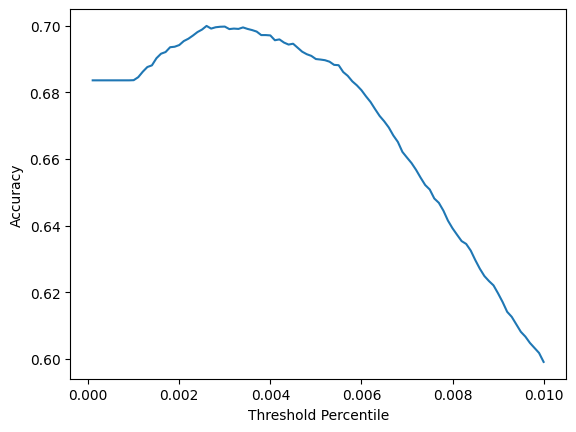

In [122]:
plt.xlabel("Threshold Percentile")
plt.ylabel("Accuracy")
plt.plot(thresholds2, accs2)

In [123]:
max_acc2 = max(accs2)
best_threshold2 = thresholds2[accs2.index(max(accs2))]
print("My best accurate %f" % max_acc2)
print("The best threshold is %f " %best_threshold2)

My best accurate 0.700000
The best threshold is 0.002600 


In [124]:
answers['Q3'] = max_acc2

In [125]:
### Question 4

In [126]:
accs3 = []
best_threshold = 0.75
#best_thresholds = [i/100 for i in range(70,81)]
#best_threshold2 = 0.002930
best_threshold2 = 0.027780
best_threshold2s = [i/100000 for i in range(2001,4001)]

In [127]:
for best_threshold2 in best_threshold2s:
   return1 = set()
   count = 0
   for ic, i in mostPopular:
     count += ic
     return1.add(i)
     if count > totalRead*best_threshold: break
   acc = 0
   for u,b,gt in Entry_Valid:
     new_sim = max_sim[(u,b)]
     if b in return1 or new_sim >= best_threshold2:
         pre = 1
     else:
        pre = 0
     if pre == gt:
        acc +=1
     acc1 = acc/len(Entry_Valid)
   print(acc1)
   accs3.append(acc1)

0.75205
0.75205
0.75205
0.75205
0.75205
0.75205
0.75205
0.75205
0.75205
0.75205
0.75205
0.75205
0.75205
0.75205
0.75205
0.75205
0.75205
0.75205
0.75205
0.75205
0.75205
0.75205
0.75205
0.75205
0.75205
0.75205
0.75205
0.75205
0.75205
0.75205
0.75205
0.75205
0.75205
0.75205
0.75205
0.75205
0.75205
0.75205
0.75205
0.75205
0.75235
0.75235
0.75235
0.75235
0.75235
0.75235
0.75235
0.75235
0.75235
0.75235
0.75235
0.75235
0.75235
0.75235
0.75235
0.75235
0.75235
0.75235
0.75235
0.75235
0.75235
0.75235
0.75235
0.75235
0.75235
0.75235
0.75235
0.75235
0.75235
0.75235
0.75235
0.75235
0.75235
0.75235
0.75235
0.75235
0.75235
0.75235
0.75235
0.75235
0.75235
0.75235
0.75235
0.7524
0.7524
0.7524
0.7524
0.7524
0.7524
0.7524
0.7524
0.7524
0.7524
0.7524
0.7524
0.7524
0.7524
0.7524
0.7524
0.7524
0.7524
0.7524
0.7524
0.7524
0.7524
0.7524
0.7524
0.7524
0.7524
0.7524
0.7524
0.7524
0.7524
0.7524
0.7524
0.7524
0.7524
0.7524
0.7524
0.7524
0.7524
0.7524
0.7524
0.7524
0.7524
0.7524
0.7524
0.7526
0.7526
0.7526
0.7526


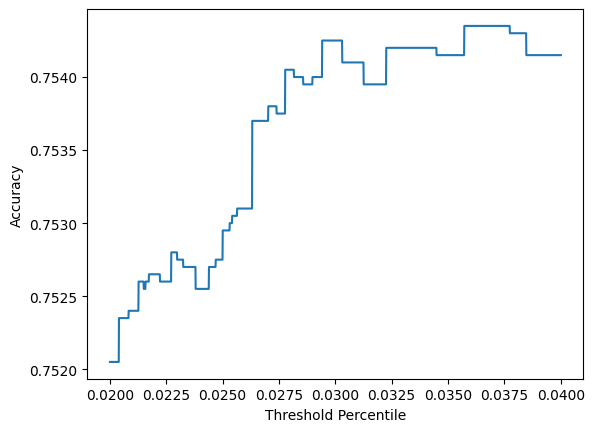

In [128]:
plt.xlabel("Threshold Percentile")
plt.ylabel("Accuracy")
plt.plot(best_threshold2s, accs3)

In [129]:
max_acc3 = max(accs3)
best_threshold = best_threshold2s[accs3.index(max(accs3))]
print("My best accurate %f" % max_acc3)
print("The best threshold is %f " % best_threshold)

My best accurate 0.754350
The best threshold is 0.035720 


In [130]:
answers['Q4'] = max_acc3

In [131]:
### Question 5

In [38]:
predictions = open("predictions_Read.csv", 'w')
for l in open("pairs_Read.csv"):
    if l.startswith("userID"):
        # header
        predictions.write(l)
        continue
    u, b = l.strip().split(',')
    jac = max_Jaccard(u, b)
    if b in return1 or new_sim >= best_threshold:
       predictions.write(u + ',' + b + ",1\n")
    else:
       predictions.write(u + ',' + b + ",0\n")

predictions.close()

In [39]:
answers['Q5'] = 'I confirm that I have uploaded an assignment submission to gradescope'

In [40]:
### Question 9

In [41]:
print(allRatings[0])

('u67805239', 'b61372131', 4)


In [51]:
ratingsTrain = allRatings[:190000]
ratingsValid = allRatings[190000:]
ItemPerUser = defaultdict(set)
UserPerItem = defaultdict(set)
ratingsPerUser = defaultdict(list)
ratingsPerItem = defaultdict(list)

users = set()
books = set()
Entry_Train = defaultdict(int)
for u,b,r in ratingsTrain:
    ratingsPerUser[u].append((b,r))
    ratingsPerItem[b].append((u,r))
    ItemPerUser[u].add(b)
    UserPerItem[b].add(u)
    Entry_Train[(u,b)] = int(r)
    books.add(b)
    users.add(u)

In [52]:
N = len(ratingsTrain)
print(N)

190000


In [56]:
#iteration function
def cal_alpha(data_dict, beta_user, beta_item, N):
    sum = 0
    for  (user, item) , rating in data_dict.items():
        sum += rating - (beta_user[user] + beta_item[item])
    return sum/N

def cal_beta_user(data_dict, items_per_user, beta_item_dict, alpha, lamb):
    beta_user_dict = {}
    for user, items in items_per_user.items():
        sum = 0
        for item in items:
            rating = data_dict[(user, item)]
            beta_item = beta_item_dict[item]
            sum += rating - (alpha +beta_item)
        beta_user = sum / (lamb + len(items_per_user[user]))
        beta_user_dict[user] = beta_user
    return beta_user_dict

def cal_beta_item(data_dict, users_per_item, beta_user_dict, alpha, lamb):
    beta_item_dict = {}
    for item, users in users_per_item.items():
        sum = 0
        for user in users:
            rating = data_dict[(user, item)]
            beta_user = beta_user_dict[user]
            sum += rating - (alpha + beta_user)
        beta_item = sum/(lamb + len(users_per_item[item]))
        beta_item_dict[item] = beta_item
    return beta_item_dict

In [57]:
#initialize
beta_user = {u : 0 for u in users}
beta_item = {b : 0 for b in books}
lamb = 1

In [58]:
iterations = 1000
x=[]
y_alpha = []
y_bu = []
y_bi = []
for it in range(iterations):
    alpha = cal_alpha(Entry_Train,beta_user,beta_item,N)
    beta_user = cal_beta_user(Entry_Train,ItemPerUser,beta_item,alpha,lamb)
    beta_item = cal_beta_item(Entry_Train,UserPerItem,beta_user,alpha,lamb)
    x.append(it)
    y_alpha.append(alpha)
    y_bu.append(beta_user['u67805239'])
    y_bi.append(beta_item['b61372131'])

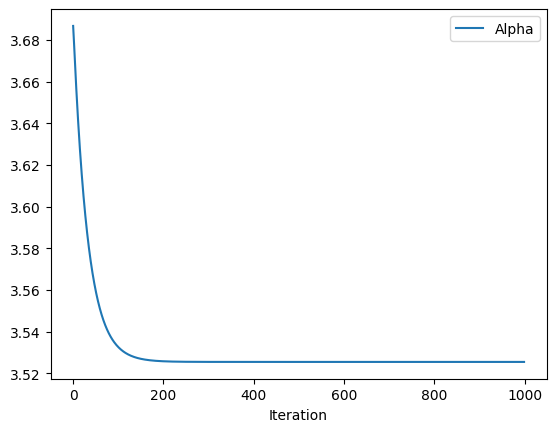

In [59]:
plt.xlabel("iterations")
plt.plot(x, y_alpha, label='Alpha')
plt.legend()

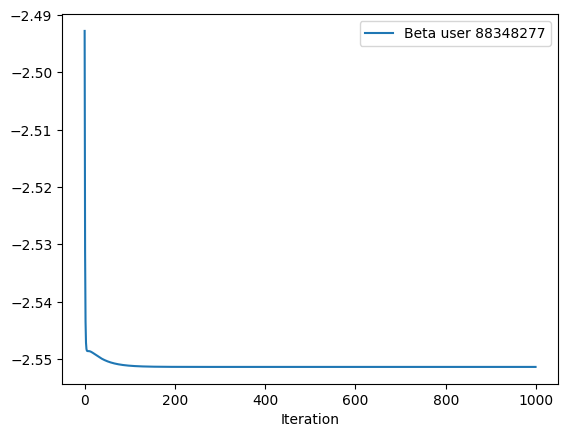

In [60]:
plt.xlabel("iterations")
plt.plot(x, y_bu)
plt.legend()

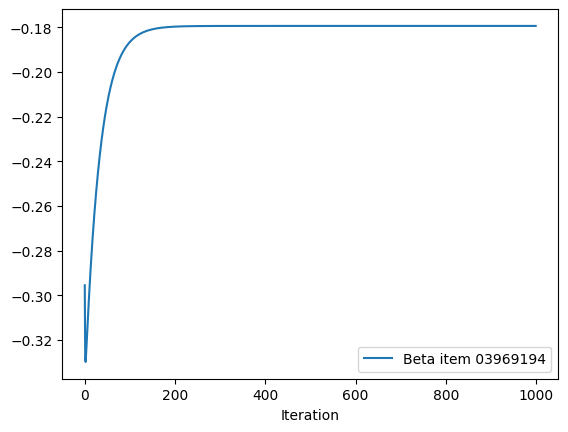

In [61]:
plt.xlabel("iterations")
plt.plot(x, y_bi)
plt.legend()

In [65]:
y = []
y_pred = []

In [66]:
def MSE(Y,Y_pred):
    mse = numpy.square(numpy.subtract(numpy.array(Y),numpy.array(Y_pred))).mean()
    return mse

In [69]:
for u,b,r in ratingsValid:
    beta_u = beta_user[u] if u in users else 0
    beta_i = beta_item[b] if b in books else 0
    y.append(r)
    pred = alpha + beta_u + beta_i
    y_pred.append(pred)
validMSE = MSE(y,y_pred)
print(validMSE)

1.4344258336689373


In [70]:
answers['Q9'] = validMSE

In [71]:
assertFloat(answers['Q9'])

In [ ]:
### 10

In [72]:
min_value = math.inf
min_id = 0
max_value = -math.inf
max_id = 0

for u in beta_user.keys():
    if min_value > beta_user[u]:
        min_value = beta_user[u]
        min_id = u
    if max_value < beta_user[u]:
        max_value = beta_user[u]
        max_id = u
maxUser = max_id
minUser = min_id
maxBeta = max_value
minBeta = min_value

In [74]:
answers['Q10'] = [maxUser, minUser, maxBeta, minBeta]
assert [type(x) for x in answers['Q10']] == [str, str, float, float]
print(answers['Q10'])

['u19874911', 'u56426501', 1.830306640903507, -3.554700003523861]


In [ ]:
### Question 11

In [77]:
lambs = [10**i for i in range(-5,6)]
print(lambs)
mses = []
mses_lamb = defaultdict(float)

[1e-05, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000, 100000]


In [78]:
for lamb in lambs:
  iterations = 1000
  #initialize
  beta_user = {u : 0 for u in users}
  beta_item = {b : 0 for b in books}
  for it in range(iterations):
    alpha = cal_alpha(Entry_Train,beta_user,beta_item,N)
    beta_user = cal_beta_user(Entry_Train,ItemPerUser,beta_item,alpha,lamb)
    beta_item = cal_beta_item(Entry_Train,UserPerItem,beta_user,alpha,lamb)
  y = []
  y_pred = []
  for u,b,r in ratingsValid:
    beta_u = beta_user[u] if u in users else 0
    beta_i = beta_item[b] if b in books else 0
    y.append(r)
    pred = alpha + beta_u + beta_i
    y_pred.append(pred)
  validMSE = MSE(y,y_pred)
  mses.append(validMSE)
  mses_lamb[validMSE]=lamb

In [82]:
mses.sort()
print(mses)
Best_lamb = mses_lamb[mses[0]]
print(Best_lamb)
lamb = Best_lamb
validMSE = mses[0]

[1.4016545111484637, 1.434425833668937, 1.5205274939775932, 1.5370565359088126, 1.5388971072321456, 1.5390837270982627, 1.5391024160568334, 1.560074163404292, 1.6474871335811534, 1.6754400622907641, 1.679707141975563]
10


In [83]:
answers['Q11'] = (lamb, validMSE)

In [84]:
assertFloat(answers['Q11'][0])
assertFloat(answers['Q11'][1])

In [ ]:
iterations = 1000
#initialize
beta_user = {u : 0 for u in users}
beta_item = {b : 0 for b in books}
for it in range(iterations):
    alpha = cal_alpha(Entry_Train,beta_user,beta_item,N)
    beta_user = cal_beta_user(Entry_Train,ItemPerUser,beta_item,alpha,lamb)
    beta_item = cal_beta_item(Entry_Train,UserPerItem,beta_user,alpha,lamb)

In [89]:
predictions = open("predictions_Rating.csv", 'w')
for l in open("pairs_Rating.csv"):
    if l.startswith("userID"): # header
        predictions.write(l)
        continue
    u,b = l.strip().split(',') # Read the user and item from the "pairs" file and write out your prediction
    # (etc.)
    beta_u = beta_user[u] if u in users else 0
    beta_i = beta_item[b] if b in books else 0
    pred = alpha + beta_u + beta_i
    predictions.write(u+","+b+","+str(pred)+"\n")
predictions.close()

In [ ]:
# Copied from baseline code
bookCount = defaultdict(int)
totalRead = 0

for user,book,_ in readCSV("train_Interactions.csv.gz"):
    bookCount[book] += 1
    totalRead += 1

mostPopular = [(bookCount[x], x) for x in bookCount]
mostPopular.sort()
mostPopular.reverse()

return1 = set()
count = 0
for ic, i in mostPopular:
    count += ic
    return1.add(i)
    if count > totalRead/2: break

In [90]:
f = open("answers_hw3.txt", 'w')
f.write(str(answers) + '\n')
f.close()